In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')

wim_w_13=pd.read_csv('Wimbledon-women-2013.csv')

Q. In general, do players having higher number of break points in a match go on to win the game? If not, what could be the reason? 

In [3]:
wim_w_13

,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.1.1,ST2.2,ST3.2,ST4.2,ST5.2
0,M.Koehler,V.Azarenka,1,0,0,2,60,21,40,8,...,16,6,8,4,NaN,6,6,NaN,NaN,NaN
1,E.Baltacha,F.Pennetta,1,0,0,2,69,23,31,6,...,6,5,14,11,NaN,6,6,NaN,NaN,NaN
2,S-W.Hsieh,T.Maria,1,1,2,0,63,17,37,10,...,1,0,8,2,NaN,1,0,NaN,NaN,NaN
3,A.Cornet,V.King,1,1,2,1,57,36,43,21,...,4,1,48,32,NaN,6,3,1.0,NaN,NaN
4,Y.Putintseva,K.Flipkens,1,0,0,2,73,34,27,12,...,9,3,35,24,NaN,7,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,A.Radwanska,N.Li,5,1,2,1,77,52,23,9,...,10,4,71,48,NaN,6,6,2.0,NaN,NaN
118,S.Lisicki,K.Kanepi,5,1,2,0,59,26,41,10,...,2,1,19,9,NaN,3,3,NaN,NaN,NaN
119,M.Bartoli,K.Flipkens,6,1,2,0,61,21,39,10,...,2,1,21,8,NaN,1,2,NaN,NaN,NaN
120,S.Lisicki,A.Radwanska,6,1,2,1,63,53,37,19,...,14,6,31,16,NaN,4,6,7.0,NaN,NaN


In [4]:
df=wim_w_13[['Player1', 'Player2', 'Result', 'BPC.1', 'BPW.1', 'BPC.2', 'BPW.2']]
df=df.replace(np.nan, 0)
df

,Player1,Player2,Result,BPC.1,BPW.1,BPC.2,BPW.2
0,M.Koehler,V.Azarenka,0,7,2,16,6
1,E.Baltacha,F.Pennetta,0,1,1,6,5
2,S-W.Hsieh,T.Maria,1,14,6,1,0
3,A.Cornet,V.King,1,14,4,4,1
4,Y.Putintseva,K.Flipkens,0,4,1,9,3
...,...,...,...,...,...,...,...
117,A.Radwanska,N.Li,1,16,5,10,4
118,S.Lisicki,K.Kanepi,1,5,4,2,1
119,M.Bartoli,K.Flipkens,1,7,5,2,1
120,S.Lisicki,A.Radwanska,1,14,6,14,6


In [5]:
unique_vals = pd.concat([df['Player1'], df['Player2']]).unique()

In [6]:
df1=pd.DataFrame(columns=['Player', 'Number of break points created', 'Number of break points won', 'Won/Lost'])

for i in range(len(unique_vals)):
    for index, row in df.iterrows():
        if unique_vals[i]==row['Player1']:
            if row['Result']==0:
                s=pd.Series([unique_vals[i], row['BPC.1'], row['BPW.1'], 'L'], index=['Player', 'Number of break points created', 'Number of break points won', 'Won/Lost'])
                df1 = pd.concat([df1, s.to_frame().T], ignore_index=True)
            elif row['Result']==1:
                s=pd.Series([unique_vals[i], row['BPC.1'], row['BPW.1'], 'W'], index=['Player', 'Number of break points created', 'Number of break points won', 'Won/Lost'])
                df1 = pd.concat([df1, s.to_frame().T], ignore_index=True)
        elif unique_vals[i]==row['Player2']:
            if row['Result']==0:
                s=pd.Series([unique_vals[i], row['BPC.2'], row['BPW.2'], 'W'], index=['Player', 'Number of break points created', 'Number of break points won', 'Won/Lost'])
                df1 = pd.concat([df1, s.to_frame().T], ignore_index=True)
            elif row['Result']==1:
                s=pd.Series([unique_vals[i], row['BPC.2'], row['BPW.2'], 'L'], index=['Player', 'Number of break points created', 'Number of break points won', 'Won/Lost'])
                df1 = pd.concat([df1, s.to_frame().T], ignore_index=True)

display(df1)

,Player,Number of break points created,Number of break points won,Won/Lost
0,M.Koehler,7,2,L
1,E.Baltacha,1,1,L
2,S-W.Hsieh,14,6,W
3,S-W.Hsieh,8,1,L
4,A.Cornet,14,4,W
...,...,...,...,...
239,F.Schiavone,3,0,L
240,T.Paszek,5,2,L
241,C.Witthoeft,2,1,L
242,J.Zheng,2,0,L


In [7]:
df2=df1[['Number of break points created', 'Number of break points won', 'Won/Lost']]
for i in range(244):
    if df1.loc[i, 'Won/Lost']=='L':
        df2.loc[i, 'Won/Lost']=0
    elif df1.loc[i, 'Won/Lost']=='W':
        df2.loc[i, 'Won/Lost']=1
df2=df2.astype(int)
df2

C:\Users\hardi\AppData\Local\Temp\ipykernel_15828\2288776685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[i, 'Won/Lost']=0
C:\Users\hardi\AppData\Local\Temp\ipykernel_15828\2288776685.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[i, 'Won/Lost']=1


,Number of break points created,Number of break points won,Won/Lost
0,7,2,0
1,1,1,0
2,14,6,1
3,8,1,0
4,14,4,1
...,...,...,...
239,3,0,0
240,5,2,0
241,2,1,0
242,2,0,0


In [8]:
df2.corr(numeric_only=False)

,Number of break points created,Number of break points won,Won/Lost
Number of break points created,1.000000,0.748996,0.409229
Number of break points won,0.748996,1.000000,0.623851
Won/Lost,0.409229,0.623851,1.000000


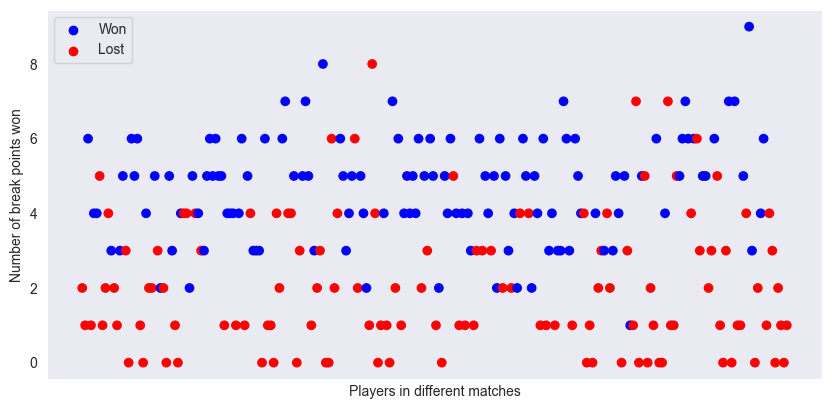

In [9]:
plt.figure(figsize=(10, 4.8))
plt.scatter(np.arange(1,245), df1['Number of break points won'], c=df1['Won/Lost'].map({'W': 'blue', 'L': 'red'}))
plt.xticks([])
plt.xlabel('Players in different matches')
plt.ylabel('Number of break points won')
plt.legend(handles=[plt.scatter([], [], color='blue', label='Won'), plt.scatter([], [], color='red', label='Lost')])
plt.show()

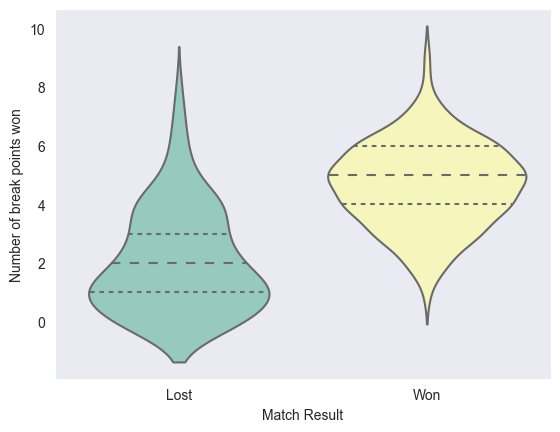

In [10]:
ax=sns.violinplot(x="Won/Lost", y="Number of break points won", data=df2, palette="Set3", inner="quartile")

ax.set_xticks(ticks=[0,1], labels=['Lost', 'Won'])
ax.set_xlabel("Match Result")
ax.set_ylabel("Number of break points won")

plt.show()